# MONOPOLO COM ESCOAMENTO

## Testes com rhoPimpleFoam
### Teste 3, 6, 9

In [ ]:
import numpy as np
import src.wave as wv
import matplotlib.pyplot as plt

microphone = np.linspace(2,102, 11)
#Teste 3
# Comportamento espacial
pSim,pFWH,pFWH2 = wv.importData('pimpleT3', time = 0.5, case = 'monopoleFlow')
x = np.linspace(2,102,len(pSim))

plt.plot(x,pSim, label = 'Cálculo Direto')
plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Teste 3\nTempo 0.5 s')
plt.grid()
plt.legend()
plt.show()

# Comportamento temporal
for m in range(len(microphone)):
    SIM, FWH, FWH2 = wv.importData('pimpleT3', case = 'monopoleFlow', probe=m)

    ti = f'Teste 3\nComportamento temporal (r = {round(microphone[m],2)} [m])'
   
    plt.plot(SIM[0], SIM[1], 'r--', label = 'Cálculo direto', alpha = 0.5)
    plt.plot(FWH[0], FWH[1], 'b--', label = 'FWH1', alpha = 0.85)
    plt.plot(FWH2[0], FWH[1], 'g--', label = 'FWH2', alpha = 0.75)

    plt.xlabel('t [s]')
    plt.ylabel('P [Pa]') 
    plt.title(ti)

    plt.legend()
    plt.grid()
    plt.show()

# Teste 6
for m in range(len(microphone)):
    SIM, FWH, FWH2 = wv.importData('pimpleT6', case = 'monopoleFlow', probe=m)

    ti = f'Teste 6\nComportamento temporal (r = {round(microphone[m],2)} [m])'
   
    plt.plot(SIM[0], SIM[1], 'r--', label = 'Cálculo direto', alpha = 0.5)
    plt.plot(FWH[0], FWH[1], 'b--', label = 'FWH1', alpha = 0.85)
    plt.plot(FWH2[0], FWH[1], 'g--', label = 'FWH2', alpha = 0.75)

    plt.xlabel('t [s]')
    plt.ylabel('P [Pa]') 
    plt.title(ti)

    plt.legend()
    plt.grid()
    plt.show()

# Teste 9

pSim,pFWH,pFWH2 = wv.importData('pimpleT9', time = 2.32, case = 'monopoleFlow')
x = np.linspace(2,102,len(pSim))

plt.plot(x,pSim, label = 'Cálculo Direto')
plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Teste 9\nTempo 2.32 s')
plt.grid()
plt.legend()
plt.show()

### Teste 10, 11

In [ ]:
T = [10,11]
for i in T:
    pSim,_,_ = wv.importData(f'pimpleT{i}', time = 0.5, case = 'monopoleFlow')
    x = np.linspace(2,102,len(pSim))

    plt.plot(x,pSim, label = 'Cálculo Direto')
    plt.xlabel('x [m]')
    plt.ylabel('p [Pa]')
    plt.title(f'Teste {i}\nTempo 0.5 s')
    plt.grid()
    plt.legend()
    plt.show()

## Testes com myrhoCentralFoam
### Teste 13, 14, 15 e 16

- T13 $\rightarrow$ malha circular
- T14 $\rightarrow$ malha quadrada
- T15 $\rightarrow$ malha circular + waveTransmisse(U)
- T16 $\rightarrow$ malha quadrada + waveTransmisse(U)

In [ ]:
import numpy as np
import src.wave as wv
import matplotlib.pyplot as plt
from pathlib import Path

# Import Data - t = 2 -> 
pSim,_,_ = wv.importData('mycentralT13', test = 'meshTest',time = 2, case = 'monopoleFlow')
pSim2,_,_= wv.importData('mycentralT14', test = 'meshTest',time = 2, case = 'monopoleFlow')
pSim3,_,_= wv.importData('mycentralT15', test = 'waveTest',time = 2, case = 'monopoleFlow')
pSim4,_,_= wv.importData('mycentralT16', test = 'waveTest',time = 2, case = 'monopoleFlow')
xa, pAna = np.loadtxt(Path('data','analiticSolution2s.dat'), unpack=True)
x        = np.linspace(-100,100,len(pSim))

# Plot comparação entre as malhas circulares
for i in range(2):
    plt.plot(x,pSim, 'b',label = 'S/ wt', alpha = 0.75)
    plt.plot(x,pSim4,'r' ,label = 'C/ wt', alpha = 0.55)
    if i!=0: plt.plot(xa, pAna,'k',label = 'analítico')

    plt.xlabel('x [m]')
    plt.ylabel('p [Pa]')
    plt.title('Comparação entre as malhas circulares\nt = 2 s')
    plt.grid()
    plt.legend()
    plt.show()

# Plot comparação entre as malhas quadriculadas
for i in range(2):
    plt.plot(x,pSim2, 'b',label = 'S/ wt', alpha = 0.75)
    plt.plot(x,pSim3,'r' ,label = 'C/ wt', alpha = 0.55)
    if i!=0: plt.plot(xa, pAna,'k',label = 'analítico')

    plt.xlabel('x [m]')
    plt.ylabel('p [Pa]')
    plt.title('Comparação entre as malhas quadriculadas\nt = 2 s')
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
import numpy as np
import src.wave as wv
import matplotlib.pyplot as plt
from pathlib import Path

# Comportamento espacial - t = 2 -> 
pSim,_,_ = wv.importData('mycentralT13', test = 'meshTest',time = 2, case = 'monopoleFlow')
pSim2,_,_= wv.importData('mycentralT14', test = 'meshTest',time = 2, case = 'monopoleFlow')
pSim3,_,_= wv.importData('mycentralT15', test = 'waveTest',time = 2, case = 'monopoleFlow')
xa, pAna = np.loadtxt(Path('data','analiticSolution2s.dat'), unpack=True)
x        = np.linspace(-100,100,len(pSim))


# Plot comparação entre as malhas
plt.plot(x,pSim, 'b',label = 'Malha circular', alpha = 0.75)
plt.plot(x,pSim2,'r' ,label = 'Malha quadrada', alpha = 0.55)
plt.plot(x, pSim3, 'g', label = 'Malha quadrada 2', alpha = 0.25)

plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Comparação entre as malhas\nt = 2 s')
plt.grid()
plt.legend()
plt.show()

# Comparação solução analítica
plt.plot(x,pSim, 'b',label = 'Malha circular', alpha = 0.75)
plt.plot(x, pSim3, 'g', label = 'Malha quadrada 2', alpha = 0.25)
plt.plot(xa, pAna,'k',label = 'analítico')

plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Comparação solução analítica\nt = 2 s')
plt.grid()
plt.legend()
plt.show()

### Testes 17, 18

- T17 $\rightarrow$ malha quadrada + waveTransmisse(U) + dampingZone
- T18 $\rightarrow$ malha circular + waveTransmisse(U) + dampingZone

Time = 2.0 
Pos = 0
Time = 2.0 
Pos = 0
Time = 2.0 
Pos = 0
Time = 2.0 
Pos = 0
Time = 2.0 
Pos = 0
Time = 2.0 
Pos = 0


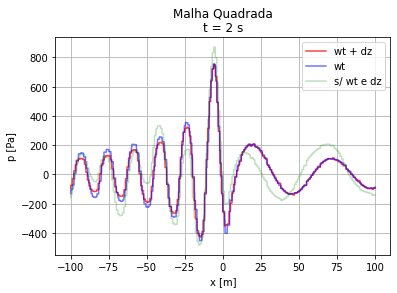

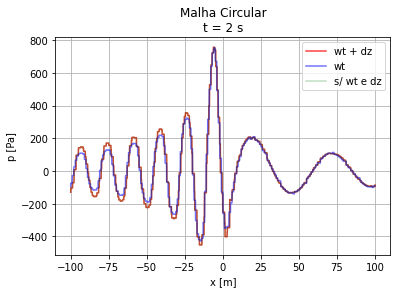

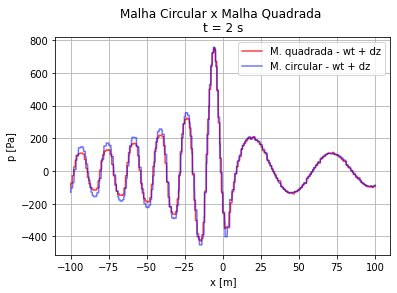

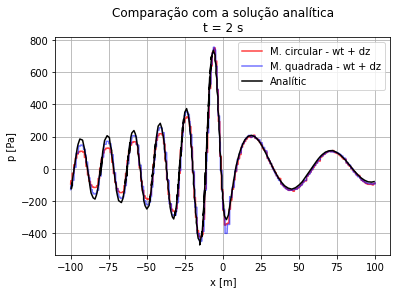

In [6]:
import numpy as np
import src.wave as wv
import matplotlib.pyplot as plt

from src.datadrive import PATH_DATA

#Import MeshTest - t = 2s
pSimT13,_,_ = wv.importData('mycentralT13', test = 'meshTest',time = 2, case = 'monopoleFlow')
pSimT14,_,_ = wv.importData('mycentralT14', test = 'meshTest',time = 2, case = 'monopoleFlow')
xMT         = np.linspace(-100,100, len(pSimT13))

# Import Data WaveTest- t = 2s 
pSimT15,_,_ = wv.importData('mycentralT15', test = 'waveTest',time = 2, case = 'monopoleFlow')
pSimT16,_,_ = wv.importData('mycentralT16', test = 'waveTest',time = 2, case = 'monopoleFlow')
xWT         = np.linspace(-100,100,len(pSimT15))

# Import Data DampingTest - t = 2s
pSimT17,_,_ = wv.importData('mycentralT17', test = 'dampingTest',time = 2, case = 'monopoleFlow')
pSimT18,_,_ = wv.importData('mycentralT18', test = 'dampingTest',time = 2, case = 'monopoleFlow')
xDT         = np.linspace(-100,100,len(pSimT17))

# Analitic Solution
xa, pAna    = np.loadtxt(PATH_DATA.joinpath('analiticSolution2s.dat'), unpack=True)


# Comparação malha quadrada    
plt.plot(xDT,pSimT17, 'r', label = 'wt + dz', alpha = 0.75)
plt.plot(xWT,pSimT16, 'b', label = 'wt', alpha = 0.55)
plt.plot(xMT, pSimT14,'g', label = 's/ wt e dz', alpha = 0.25)

plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Malha Quadrada\nt = 2 s')
plt.grid()
plt.legend()
plt.show()

# Comparação malha circular    
plt.plot(xDT,pSimT18, 'r', label = 'wt + dz', alpha = 0.75)
plt.plot(xWT,pSimT15, 'b', label = 'wt', alpha = 0.55)
plt.plot(xMT,pSimT13, 'g', label = 's/ wt e dz', alpha = 0.25)

plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Malha Circular\nt = 2 s')
plt.grid()
plt.legend()
plt.show()

# Comparação entre malhas
plt.plot(xDT,pSimT17, 'r', label = 'M. quadrada - wt + dz', alpha = 0.75)
plt.plot(xDT,pSimT18, 'b', label = 'M. circular - wt + dz', alpha = 0.55)

plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Malha Circular x Malha Quadrada \nt = 2 s')
plt.grid()
plt.legend()
plt.show()

# Comparação com a solução analítica
plt.plot(xDT,pSimT17, 'r', label = 'M. circular - wt + dz', alpha = 0.75)
plt.plot(xDT,pSimT18, 'b', label = 'M. quadrada - wt + dz', alpha = 0.55)
plt.plot(xa, pAna,    'k', label = 'Analític', alpha = 1)


plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Comparação com a solução analítica\nt = 2 s')
plt.grid()
plt.legend()
plt.show()

Time = 0.35 
Pos = 0
Time = 0.35 
Pos = 0
Time = 0.35 
Pos = 0
Time = 0.35 
Pos = 0


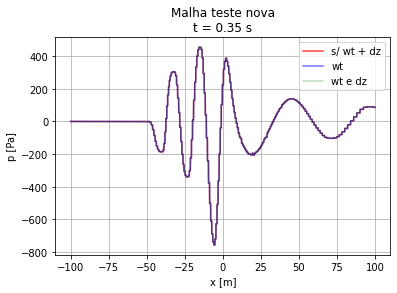

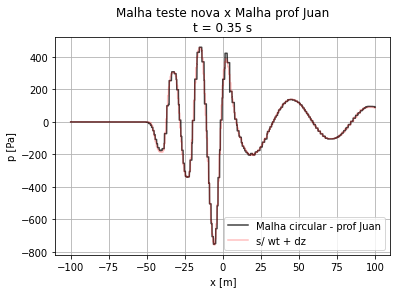

In [24]:
# Import Data DampingTest - t = 0.35s
pSimT18,_,_ = wv.importData('mycentralT18', test = 'dampingTest',time = 0.35, case = 'monopoleFlow')
xDT         = np.linspace(-100,100,len(pSimT18))

# Import Data New Mesh - t = 0.35s
pSimT1,_,_ = wv.importData('teste1', test = 'newMesh',time = 0.35, case = 'monopoleFlow')
pSimT2,_,_ = wv.importData('teste2', test = 'newMesh',time = 0.35, case = 'monopoleFlow')
pSimT3,_,_ = wv.importData('teste3', test = 'newMesh',time = 0.35, case = 'monopoleFlow')
xNM        = np.linspace(-100,100,len(pSimT1))


# Comparação malha circular    
plt.plot(xNM,pSimT1, 'r', label = 's/ wt + dz', alpha = 0.75)
plt.plot(xNM,pSimT2, 'b', label = 'wt', alpha = 0.55)
plt.plot(xNM,pSimT3, 'g', label = 'wt e dz', alpha = 0.25)

plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Malha teste nova\nt = 0.35 s')
plt.grid()
plt.legend()
plt.show()

# Comparação com malha do prof Juan
plt.plot(xDT,pSimT18, 'k', label = 'Malha circular - prof Juan', alpha = 0.75)
plt.plot(xNM,pSimT1, 'r', label = 's/ wt + dz', alpha = 0.25)

plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Malha teste nova x Malha prof Juan\nt = 0.35 s')
plt.grid()
plt.legend()
plt.show()

# Teste da função

In [ ]:
import numpy as np
import src.wave as wv
from src.datadrive import PATH_DATA
import matplotlib.pyplot as plt
from pathlib import Path

# Função 1
x = np.linspace(-100,100,1000)
pFlow, XYplt = wv.pressureFlow2(nxy = (401,401), t = 2)
xa, pAna = np.loadtxt(Path('data','analiticSolution2s.dat'), unpack=True)

# X,P = np.loadtxt(Path(PATH_DATA, 'teste12s.dat'), unpack=True)
# plt.plot(X,P,'r')

plt.plot(XYplt[0],XYplt[1], label = "discreta")
plt.plot(xa, pAna,'k--', label = 'simbólica')
plt.xlabel("x [m]")
plt.ylabel("p [Pa]")
plt.title("Comparação das soluções analíticas\nt = 2s")
plt.xlim([-100,100])
plt.grid()
plt.legend()
plt.plot()

In [4]:
import numpy as np
from src.datadrive import PATH_DATA

print(PATH_DATA.joinpath('monopoleFlow','probes', 'dampingTest', 'mycentralT17','2').exists())



True


In [ ]:
0%100